## Testing different LLMs to test their performance on extracting information out of Presentation Slides



### Before getting started: extract each slide out of an example presentation
Example Data: [I3D:bio's Training Material for Omero](https://doi.org/10.5281/zenodo.8323588) (Schmidt, C., Bortolomeazzi, M. et al., 2023). For the following code to run, download the pdf in your current folder and name it ['WhatIsOMERO.pdf'](https://zenodo.org/records/8323588/files/202310_GENERAL_OMERO_Material_01_WhatIsOMERO.pdf?download=1) .

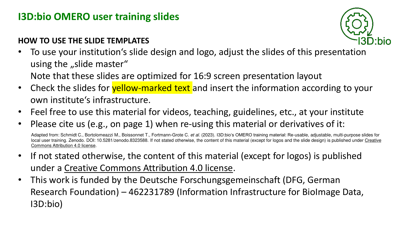

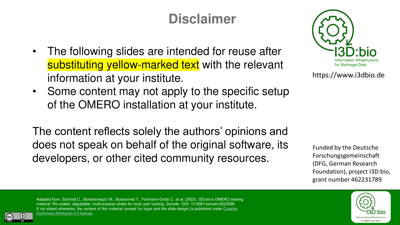

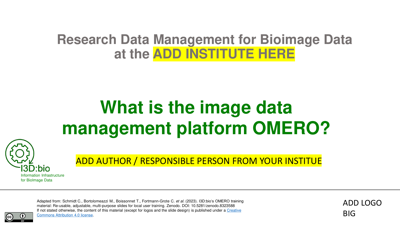

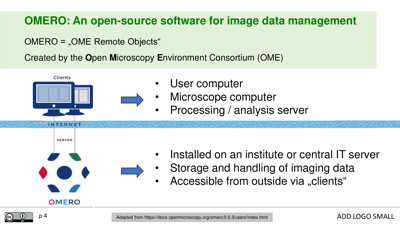

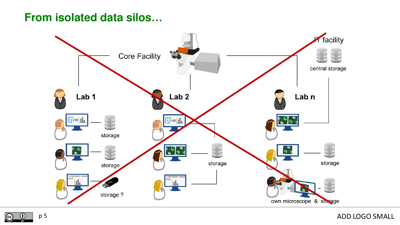

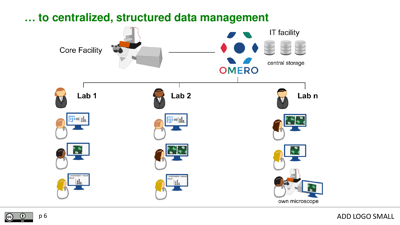

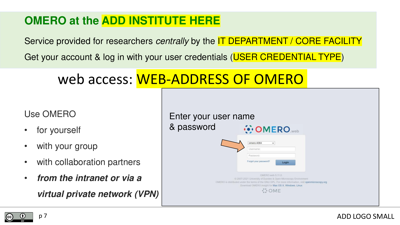

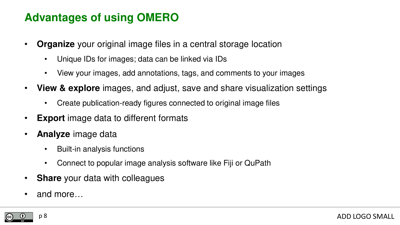

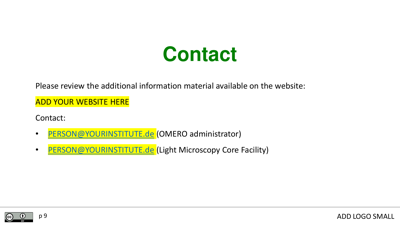

In [1]:
from pdf2image import convert_from_path
from IPython.display import display
from PIL import Image

# Function to process the PDF and display each page as a resized image
def pdf_to_images(pdf_path, width=400):
    # Convert PDF to list of images (one for each page)
    images = convert_from_path(pdf_path)
    
    # Display each resized image in the notebook
    for img in images:
        # Calculate the new height to maintain the aspect ratio
        aspect_ratio = img.height / img.width
        new_height = int(width * aspect_ratio)
        
        # Resize the image
        img_resized = img.resize((width, new_height))
        
        # Display the resized image
        display(img_resized)

    return images

# Example usage
pdf_path = "WhatIsOMERO.pdf"
images = pdf_to_images(pdf_path)

### Option to save those Images on disc:

In [2]:
# Function to process the PDF and save each page as an image
def saving_images(image_list):

    # Loop over each image (page) and save with an incrementing filename
    for i, image in enumerate(images, start=1):
        image_filename = f"slide{i}.png"  # Naming each slide as slide1.png, slide2.png, etc.
        image.save(image_filename, "PNG")
        print(f"Saved {image_filename}")

saving_images(images)

Saved slide1.png
Saved slide2.png
Saved slide3.png
Saved slide4.png
Saved slide5.png
Saved slide6.png
Saved slide7.png
Saved slide8.png
Saved slide9.png


## 1. [OpenAi GPT-4o](https://github.com/marketplace/models/azure-openai/gpt-4o)

In [4]:
import os
from azure.ai.inference import ChatCompletionsClient
from azure.ai.inference.models import (
    SystemMessage,
    UserMessage,
    TextContentItem,
    ImageContentItem,
    ImageUrl,
    ImageDetailLevel,
)
from azure.core.credentials import AzureKeyCredential

token = os.environ["GITHUB_TOKEN"]
endpoint = "https://models.inference.ai.azure.com"
model_name = "gpt-4o"

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(token),
)
for i in range(1,(len(images)+1)):
    response = client.complete(
        messages=[
            SystemMessage(
                content="You are a professional Data Scientist specializing in Image Data Analysis and Research Data Management."
            ),
            UserMessage(
                content=[
                    TextContentItem(text="Give me a short and precise summary (1-3 whole sentences) of what is displayed or explained in this Slide."),
                    ImageContentItem(
                        image_url=ImageUrl.load(
                            image_file=f"slide{i}.png",
                            image_format="png",
                            detail=ImageDetailLevel.LOW)
                    ),
                ],
            ),
        ],
        model=model_name,
    )
    
    print(f"Slide {i} Summary:\n", response.choices[0].message.content, "\n")

Slide 1 Summary:
 This slide provides guidelines on using slide templates for I3D:bio OMERO training, including instructions on adjusting slides to fit the institute's style and noting the usage restrictions under a Creative Commons Attribution 4.0 license. It specifies that certain slides are optimized for a 16:9 screen layout and highlights the importance of adapting yellow-marked text with institute-specific information. Additionally, it acknowledges funding support from the Deutsche Forschungsgemeinschaft (DFG). 

Slide 2 Summary:
 The slide provides a disclaimer about the reuse of content, indicating that yellow-marked text should be personalized for the user's institute. It notes that the content might not apply to specific setups of the OMERO installation at the user's location and reflects the authors' opinions, not officially endorsed by the original software or its community. 

Slide 3 Summary:
 The slide introduces a presentation on research data management for bioimage data

## 2. [Llama-3.2-11B-Vision-Instruct](https://github.com/marketplace/models/azureml-meta/Llama-3-2-11B-Vision-Instruct)

Set up the Model and again let it loop through the Images (Slides) and let it summarize their content:

In [44]:
model_name = "Llama-3.2-11B-Vision-Instruct"

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(token),
)
for i in range(1,(len(images)+1)):
    response = client.complete(
        messages=[
            SystemMessage(
                content="You are a professional Data Scientist specializing in Image Data Analysis and Research Data Management."
            ),
            UserMessage(
                content=[
                    TextContentItem(text="Give me a short and precise summary (1-3 whole sentences) of what is displayed or explained in this Slide."),
                    ImageContentItem(
                        image_url=ImageUrl.load(
                            image_file=f"slide{i}.png",
                            image_format="png",
                            detail=ImageDetailLevel.LOW)
                    ),
                ],
            ),
        ],
        model=model_name,
    )
    
    print(f"Slide {i} Summary:\n", response.choices[0].message.content, "\n")

Slide 1 Summary:
 Here is a summary of the image:

This image displays a slide template, which outlines instructions for effectively utilizing the slides. It provides guidance on optimizing the slides for a 16:9 screen presentation layout and offers suggestions for inserting information and using the material. Additionally, it indicates that the content of the material, excluding the logo, is available under a Creative Commons Attribution 4.0 license. 

Slide 2 Summary:
 This slide presents a disclaimer for slides intended to be reused from the i3D:bio project, specifically those with yellow-marked text containing relevant information about the institute. It clarifies that some content may not apply to the specific setup of the OMERO installation at the user's institute and that the content reflects solely the authors' opinions without speaking on behalf of the original software developers or cited community resources. 

Slide 3 Summary:
 This slide is related to the image data managem

## 3. [Phi-3.5-vision instruct (128k)](https://github.com/marketplace/models/azureml/Phi-3-5-vision-instruct)
Again, same Set-Up (just a different model name):

In [45]:
model_name = "Phi-3.5-vision-instruct"

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(token),
)
for i in range(1,(len(images)+1)):
    response = client.complete(
        messages=[
            SystemMessage(
                content="You are a professional Data Scientist specializing in Image Data Analysis and Research Data Management."
            ),
            UserMessage(
                content=[
                    TextContentItem(text="Give me a short and precise summary (1-3 whole sentences) of what is displayed or explained in this Slide."),
                    ImageContentItem(
                        image_url=ImageUrl.load(
                            image_file=f"slide{i}.png",
                            image_format="png",
                            detail=ImageDetailLevel.LOW)
                    ),
                ],
            ),
        ],
        model=model_name,
    )
    
    print(f"Slide {i} Summary:\n", response.choices[0].message.content, "\n")

Slide 1 Summary:
  The slide provides instructions on how to use the slide templates for a presentation, including customization for different screen layouts, checking for yellow-marked text, and citation guidelines. It also mentions the licensing of the content under a Creative Commons Attribution 4.0 license and credits the funding source. 

Slide 2 Summary:
  The slide serves as a disclaimer for a presentation, indicating that the slides are intended for reuse with cautionary notes about substituting text and applying specific OMERO installation setup. It also clarifies that the content is based on the authors' opinions and does not represent the software or its developers. 

Slide 3 Summary:
  The slide is a template for a presentation on "Research Data Management for Bioimage Data" at a specific institute, with a focus on explaining the image data management platform OMERO. It includes placeholders for the institute's name, author/responsible person, and logo, along with reference

## 4. [Llama-3.2-90B-Vision-Instruct](https://github.com/marketplace/models/azureml-meta/Llama-3-2-90B-Vision-Instruct)

In [5]:
model_name = "Llama-3.2-90B-Vision-Instruct"

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(token),
)
for i in range(1,(len(images)+1)):
    response = client.complete(
        messages=[
            SystemMessage(
                content="You are a professional Data Scientist specializing in Image Data Analysis and Research Data Management."
            ),
            UserMessage(
                content=[
                    TextContentItem(text="Give me a short and precise summary (1-3 whole sentences) of what is displayed or explained in this Slide."),
                    ImageContentItem(
                        image_url=ImageUrl.load(
                            image_file=f"slide{i}.png",
                            image_format="png",
                            detail=ImageDetailLevel.LOW)
                    ),
                ],
            ),
        ],
        model=model_name,
    )
    
    print(f"Slide {i} Summary:\n", response.choices[0].message.content, "\n")

Slide 1 Summary:
 This Slide provides instructions on how to use and modify the slides for institutional use, ensuring that the material follows the Creative Commons Attribution 4.0 license and includes the necessary citations. 

Slide 2 Summary:
 The slide provides a disclaimer regarding the reuse of slides, stating that they are intended for reuse after substituting yellow-marked text with relevant information at the user's institute. Additionally, it clarifies that some content may not apply to the specific setup of the OMERO installation at the user's institute. The content reflects solely the authors' opinions and does not speak on behalf of the original software, its developers, or other cited community resources. 

Slide 3 Summary:
 The slide is titled "Research Data Management for Bioimage Data at the ADD INSTITUTE HERE" and appears to be a template for a presentation about image data management. The main content of the slide asks, "What is the image data management platform OM

## 5. [GPT-4o mini](https://github.com/marketplace/models/azure-openai/gpt-4o-mini)

In [6]:
model_name = "gpt-4o-mini"

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(token),
)
for i in range(1,(len(images)+1)):
    response = client.complete(
        messages=[
            SystemMessage(
                content="You are a professional Data Scientist specializing in Image Data Analysis and Research Data Management."
            ),
            UserMessage(
                content=[
                    TextContentItem(text="Give me a short and precise summary (1-3 whole sentences) of what is displayed or explained in this Slide."),
                    ImageContentItem(
                        image_url=ImageUrl.load(
                            image_file=f"slide{i}.png",
                            image_format="png",
                            detail=ImageDetailLevel.LOW)
                    ),
                ],
            ),
        ],
        model=model_name,
    )
    
    print(f"Slide {i} Summary:\n", response.choices[0].message.content, "\n")

Slide 1 Summary:
 The slide provides instructions on how to use slide templates for I3D:bio OMERO user training, emphasizing the importance of adhering to the specified design and logo, and referring to the "slide master" for formatting. It also highlights that the templates are optimized for a 16:9 aspect ratio and encourages users to customize the content according to their institution's branding. Additionally, it notes the licensing information for the material. 

Slide 2 Summary:
 The slide is a disclaimer indicating that the following content is meant for reuse with relevant modifications highlighted in yellow. It notes that the content may not apply to all setups of the OMERO installation and reflects the authors' opinions, not those of the original software's developers or community resources. 

Slide 3 Summary:
 The slide introduces the concept of the image data management platform OMERO, highlighting its relevance for managing bioimage data at the specified institute. It is pa